                            OLS Regression Results                            
Dep. Variable:                log_GDP   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.069
Method:                 Least Squares   F-statistic:                   0.03177
Date:                Wed, 05 Nov 2025   Prob (F-statistic):              0.861
Time:                        22:10:32   Log-Likelihood:                -20.953
No. Observations:                  16   AIC:                             45.91
Df Residuals:                      14   BIC:                             47.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.1538      0.550     49.380      0.0

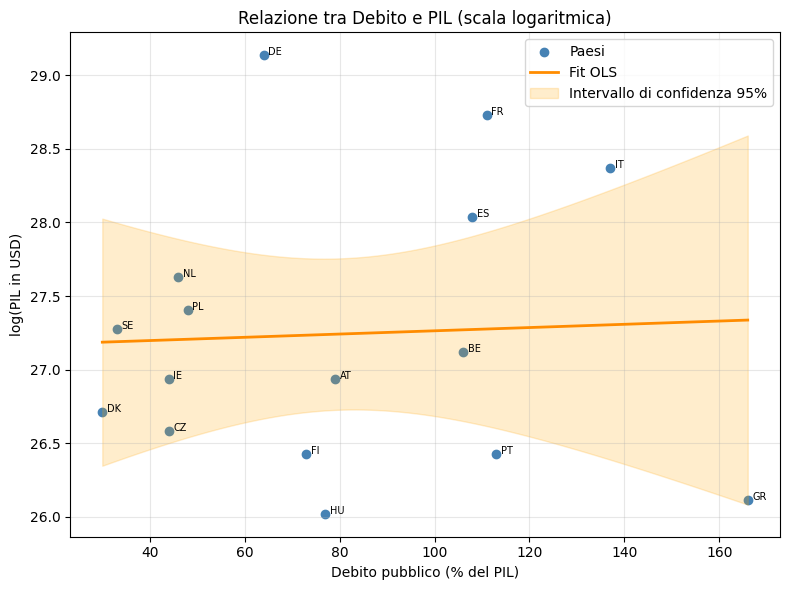

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# =========================
# 1) dati "finti" ma realistici
# =========================
data = {
    "Country": [
        "IT",
        "DE",
        "FR",
        "ES",
        "NL",
        "SE",
        "PL",
        "BE",
        "AT",
        "PT",
        "GR",
        "IE",
        "FI",
        "CZ",
        "DK",
        "HU",
    ],
    "Debt_GDP": [137, 64, 111, 108, 46, 33, 48, 106, 79, 113, 166, 44, 73, 44, 30, 77],
    "GDP_USD": [
        2100e9,
        4500e9,
        3000e9,
        1500e9,
        1000e9,
        700e9,
        800e9,
        600e9,
        500e9,
        300e9,
        220e9,
        500e9,
        300e9,
        350e9,
        400e9,
        200e9,
    ],
}

df = pd.DataFrame(data)

# =========================
# 2) regressione: log(GDP) ~ Debt_GDP
# =========================
df["log_GDP"] = np.log(df["GDP_USD"])

X = sm.add_constant(df["Debt_GDP"])
y = df["log_GDP"]
model = sm.OLS(y, X).fit()
print(model.summary())

# =========================
# 3) Intervallo di confidenza
# =========================
x_line = np.linspace(df["Debt_GDP"].min(), df["Debt_GDP"].max(), 100)
X_pred = sm.add_constant(x_line)
pred = model.get_prediction(X_pred)
pred_summary = pred.summary_frame(alpha=0.05)  # 95% CI

# =========================
# 4) Plot
# =========================
plt.figure(figsize=(8, 6))

# scatter
plt.scatter(df["Debt_GDP"], df["log_GDP"], color="steelblue", label="Paesi")

# retta stimata
plt.plot(x_line, pred_summary["mean"], color="darkorange", linewidth=2, label="Fit OLS")

# intervallo di confidenza
plt.fill_between(
    x_line,
    pred_summary["mean_ci_lower"],
    pred_summary["mean_ci_upper"],
    color="orange",
    alpha=0.2,
    label="Intervallo di confidenza 95%",
)

# etichette
for _, row in df.iterrows():
    plt.text(row["Debt_GDP"] + 1, row["log_GDP"], row["Country"], fontsize=7)

plt.xlabel("Debito pubblico (% del PIL)")
plt.ylabel("log(PIL in USD)")
plt.title("Relazione tra Debito e PIL (scala logaritmica)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()